## Natural Processing Language -  Word Frequency Visualization

<p>`what is the most frequent words in novel "Poirot Investigate" by Agatha Christie and how often they occur?`</p>
<p>`In this notebook we will try to scape the novel "Poirot Investigate" using Beautiful Soup from gutenberg project. You can access this` <a href="http://www.gutenberg.org/files/61262/61262-h/61262-h.htm" target="_blank"> novel</a> `within gutenberg website.` <a href="http://www.gutenberg.org/" target="_blank"> Gutenberg</a> `is a one of website that provide free e-books with copyright that has already expired (mostly older books). Then we will try extract words using Beautiful Soup`</p> 

<p>`Beautiful soup is one the python library for getting data from markup languages (HTML, XML, etc). Beautiful soup will help you to pull particulary data from webpage, remove the html and any other markup tag into format that you desire for example only text. You can learn more by access beautiful soup` <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/" target="_blank"> documentation. </a> `After srape the date, we will dive into` <a href="https://www.nltk.org/" target="_blank"> NLTK (Natural Language TooKit). </a> `to analyzing the words distibution and also using` <a href="https://docs.python.org/3/library/collections.html" target="_blank"> Counter  </a> and Requests package. </p>

<p>`Let's start by loading python package that we gonna use in this notebook.` </p>

### 1. Load Package

In [2]:
#load package
from bs4 import BeautifulSoup
import nltk
import requests
from collections import Counter
import matplotlib.pyplot as plt 

### 2. Request Data
<p> `We need URL to access it's content from gutenberg  and scrape it's data with beutiful soup` </p>
URL novel -> http://www.gutenberg.org/files/61262/61262-h/61262-h.htm


In [80]:
#get the URL
r = requests.get('https://www.gutenberg.org/files/61262/61262-h/61262-h.htm')


#setting the encoding html
r.encoding = 'utf-8'

#extract html 
html = r.text

#print some of the result
print(html[0:500])

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml" xml:lang="en" lang="en">
  <head>
    <meta http-equiv="Content-Type" content="text/html; charset=utf-8"/>
    <meta http-equiv="Content-Style-Type" content="text/css" />
    <title>
      The Project Gutenberg eBook of Poirot Investigates by Agatha Christie.
    </title>

    <style type="text/css">

body {
    margin-left: 10%


### 3. Extract Text
<p>After we get the data, it's time to format into the data we desire. In this notebook, we want to pull only the text from HTML format using Request package before. You can use BeautfulSoup <a href="https://www.crummy.com/software/BeautifulSoup/bs4/doc/" target="_blank"> documentation. </a> on how to get the data.</p>

In [51]:
#Create BeautifulSoup Object
soup = BeautifulSoup(html,"html.parser")

#getting the text
text = soup.get_text()
print(text[:500])







      The Project Gutenberg eBook of Poirot Investigates by Agatha Christie.
    


body {
    margin-left: 10%;
    margin-right: 10%;
}

    h1,h2, h3 {
    text-align: center; /* all headings centered */
    clear: both;
	font-weight: normal;
}

h1 {
    margin-bottom: 2em;
}

h2 {
    margin-top: 2.99em;
    font-size: medium;
	margin-bottom: 1.0em;
}

h3 {
    font-size: medium;
}

p {
    margin-top: .99em;
    text-align: justify;
	text-indent: 1em;



In [83]:
# Exploration - > all this snytax you can find on documentation BeautifulSoup
soup.title
soup.find_all('a')

[<a href="#CH1">I The Adventure of “The Western Star”</a>,
 <a href="#CH2">II The Tragedy at Marsdon Manor</a>,
 <a href="#CH3">III The Adventure of the Cheap Flat</a>,
 <a href="#CH4">IV The Mystery of Hunter’s Lodge</a>,
 <a href="#CH5">V The Million Dollar Bond Robbery</a>,
 <a href="#CH6">VI The Adventure of the Egyptian Tomb</a>,
 <a href="#CH7">VII Jewel Robbery at the <i>Grand Metropolitan</i></a>,
 <a href="#CH8">VIII The Kidnapped Prime Minister</a>,
 <a href="#CH9">IX The Disappearance of Mr. Davenheim</a>,
 <a href="#CH10">X The Adventure of the Italian Nobleman</a>,
 <a href="#CH11">XI The Case of the Missing Will</a>]

### 4. Extract the words
<p>`The next step is to analyzing the words using ntlk. The first step is by create tokenizer for the text. Tokenization is a process of tokenizing or splitting a string, text into a list of token. For example from a sentence, the token is each of word that make that whole sentences, or token of paragraph is the sentences.`  </p>

In [71]:
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

<p> `From the code above "('\w+')" we use some Regex. `</p>
<p> `\w : Will match with any character alphanumeric A-z, a-z, 0-9 that include with undercore `</p>
<p> `+  : Previous character in the regex can appear as many times `</p>

`You can learn about regex in documentation `<a href="http://www.nltk.org/api/nltk.tokenize.html?highlight=regexp#module-nltk.tokenize.regexp" target="_blank"> NLTK.</a> `or` <a href="https://www.w3schools.com/python/python_regex.asp" target="_blank"> W3SCHOOL. </a>

In [72]:
tokens = tokenizer.tokenize(text)
print(tokens[0:5])

['The', 'Project', 'Gutenberg', 'eBook', 'of']


In [73]:
#lowercase the tokens
#we should lowercase all the token as it is case sensitive
token_in_lowercase = [token.lower() for token in tokens]
print(token_in_lowercase[:10])

['the', 'project', 'gutenberg', 'ebook', 'of', 'poirot', 'investigates', 'by', 'agatha', 'christie']


### 5. Stop Words
<p>`A stop word is a commonly used words such as 'the','a','an' etc. We can consider to ignore this words to increase time prcessing. We can remove this word by using list of word that we consider stop words. NLTK has list of this kind of stop words that we can use in many languages. See documentation in NLTK about list of stop word that available.`</p>

In [9]:
#download stop words
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\silva\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
stopword = nltk.corpus.stopwords.words('english')
print(stopword[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


### 6 Remove Stop Words

`It's time to remove stop word from out token. So we can get real data that we want to analyze`

In [74]:
stopword_remove = [word for word in token_in_lowercase if word not in stopword]
print(stopword_remove[:10])

['project', 'gutenberg', 'ebook', 'poirot', 'investigates', 'agatha', 'christie', 'body', 'margin', 'left']


In [75]:
count = Counter(stopword_remove)
top_7 = count.most_common(7)
print(top_7)

[('poirot', 523), ('one', 224), ('said', 205), ('mr', 167), ('man', 163), ('would', 123), ('see', 121)]


### 7.Validate the result

`We need to ensure the result of top 7 words that occure in "Poirot Investigate". We test all the top 7 value a to make sure that all top 7 words not include in stop words.`

In [77]:
words,count = zip(*top_7)
print(words in stopword)

False


### 8.Visualizing Data

`Time to visualize word frequency in Poirot Investigate novel with matplotlib package. Because Counter Object (most_common) returned list with tuple, we can make word frequency visualiazation with zip function or dataframe `

<a href="https://docs.python.org/3.3/library/functions.html#zip" target="_blank"> Zip() Documentation </a>

***
`I recommended use matplotlib package with version > 2.2.0 because there is a bug with version < 2.2.0 where X axix is always sorted even the figure is string. You can read this bug in this` <a href="https://github.com/matplotlib/matplotlib/issues/9312" target="_blank">this link</a>

`Follow` <a href="https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html" target="_blank"> this link</a>
` if you want to know more about matplotlib style`
***

#### Data visualization with Zip()

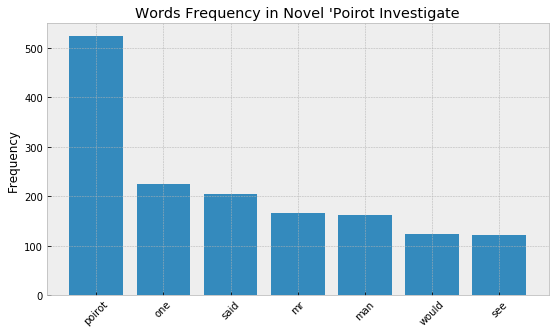

In [81]:
x,y = zip(*top_7)
plt.style.use("bmh")
fig,ax = plt.subplots()
ax.bar(x,y)
ax.set_xticklabels (x, rotation = 45)
ax.set_title("Words Frequency in Novel 'Poirot Investigate")
ax.set_ylabel("Frequency")
fig.set_size_inches([9,5])
plt.show()

#### Data visualization with dataframe

In [23]:
import pandas as pd
df =pd.DataFrame(top_7, columns = ["Word","Count"])
df


,Word,Count
0,poirot,523
1,one,224
2,said,205
3,mr,167
4,man,163
5,would,123
6,see,121


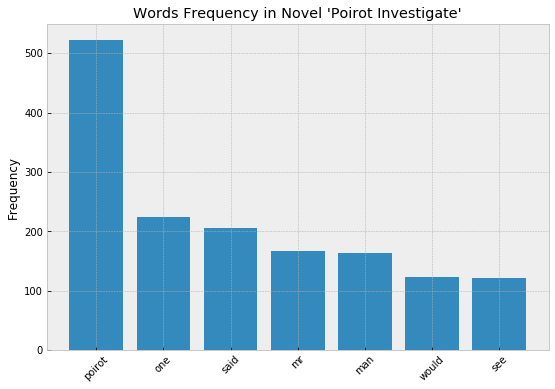

In [82]:
plt.style.use("bmh")

fig,ax = plt.subplots()
ax.bar(df["Word"],df["Count"])
ax.set_xticklabels (df["Word"], rotation = 45)
ax.set_title("Words Frequency in Novel 'Poirot Investigate'")
ax.set_ylabel("Frequency")
fig.set_size_inches([9,6])
plt.show()